## Chapter 7B: Data Visualization 
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) (to be published)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

##### <div class="alert alert-block alert-success"> Introduction </div>

Data visualization is a crucial part of data analysis. It allows us to understand and communicate the underlying patterns in data. In this lecture, we will cover the basic principles of data visualization and how to implement them in `R` using `ggplot2`.



By the end of this chapter, you will have the skills to visualize data using more sophisticated techniques and pair that with your knowledge on effective communication of results. 


##### <div class="alert alert-block alert-success">ggplot2</div>

`ggplot2` is a powerful R package for creating complex and customizable plots. It is based on the Grammar of Graphics, which provides a systematic way to describe and construct a wide range of plots.

**Key Components of `ggplot2`:**
- **Data**: The dataset being visualized.
- **Aesthetics (`aes`)**: The visual properties of the data (e.g., x and y coordinates, colors, sizes).
- **Geometries (`geom`)**: The type of plot or shape to represent the data (e.g., points, lines, bars).
- **Facets**: Subplots that show subsets of the data.
- **Themes**: Customization options for the appearance of the plot.

In [27]:
install.packages("patchwork")
install.packages("ggcorrplot")
# install.packages("paletteer")


  There is a binary version available but the source version is later:
          binary source needs_compilation
patchwork  1.2.0  1.3.0             FALSE



installing the source package ‘patchwork’




In [33]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(patchwork)
library(ggcorrplot)
# library(paletteer)

Warning message:
“package ‘paletteer’ was built under R version 4.2.3”


##### <div class="alert alert-block alert-success"> Basic Plots </div>

Let's start by creating some basic plots using `ggplot2`.

#### Scatter Plot

Scatter plots are useful for visualizing the relationship between two continuous variables. 
We will start with a basic scatter plot and then explore how to add groups, fitted lines, and sorting.



In [4]:
# Example dataset: mtcars
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


##### 1. Basic Scatter Plot

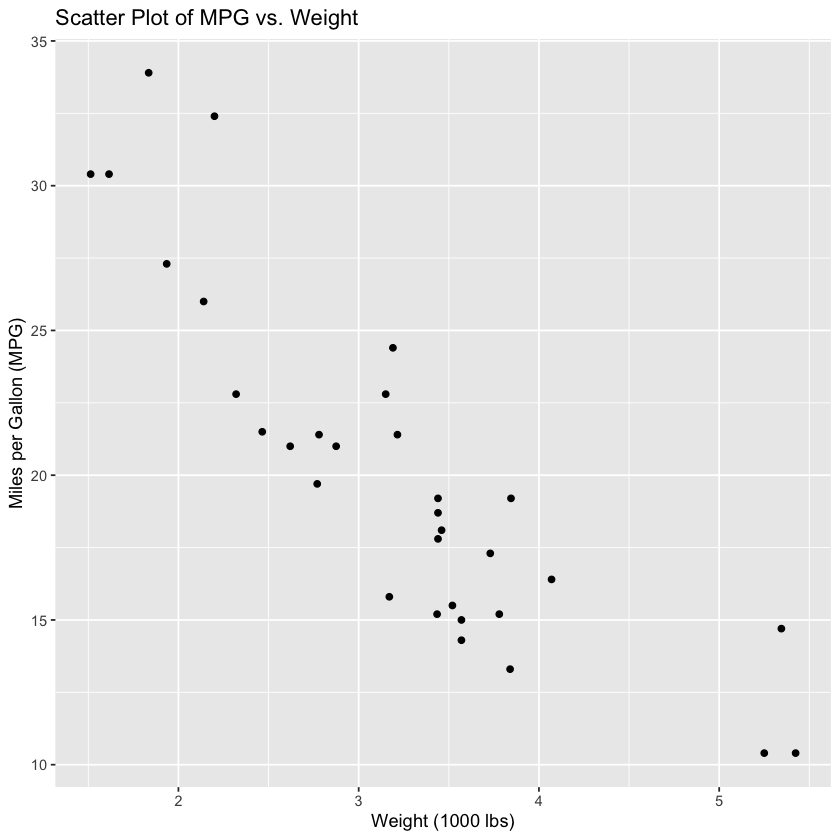

In [1]:
# Create a basic scatter plot
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(title = "Scatter Plot of MPG vs. Weight",
       x = "Weight (1000 lbs)",
       y = "Miles per Gallon (MPG)")

##### 2. Grouped Scatter Plot with Color and Shape

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


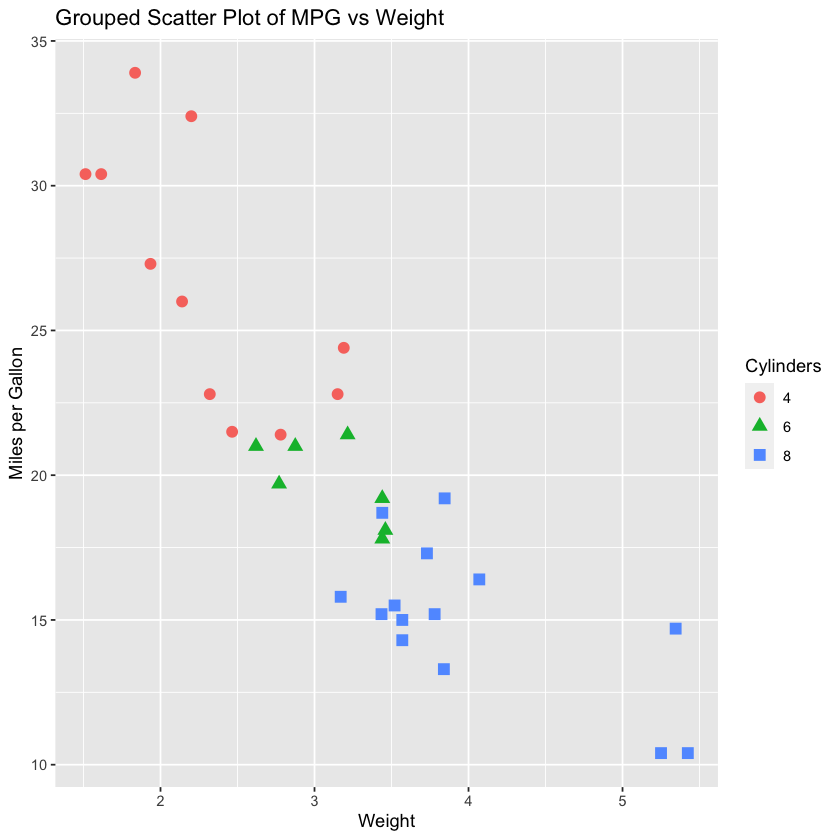

In [5]:
# Convert 'cyl' (number of cylinders) to a factor for grouping
mtcars$cyl <- as.factor(mtcars$cyl)
head(mtcars)

# Grouped scatter plot using 'cyl' as a grouping variable
ggplot(mtcars, aes(x = wt, y = mpg, color = cyl, shape = cyl)) +
    geom_point(size = 3) +
    labs(title = "Grouped Scatter Plot of MPG vs Weight", x = "Weight", y = "Miles per Gallon", color = "Cylinders", shape = "Cylinders")

##### 3. Scatter Plot with Fitted Line and Standard Error (SE)
Adding a fitted line along with a confidence interval helps in visualizing the trend and understanding the uncertainty in the trend.

`geom_smooth()` using formula = 'y ~ x'


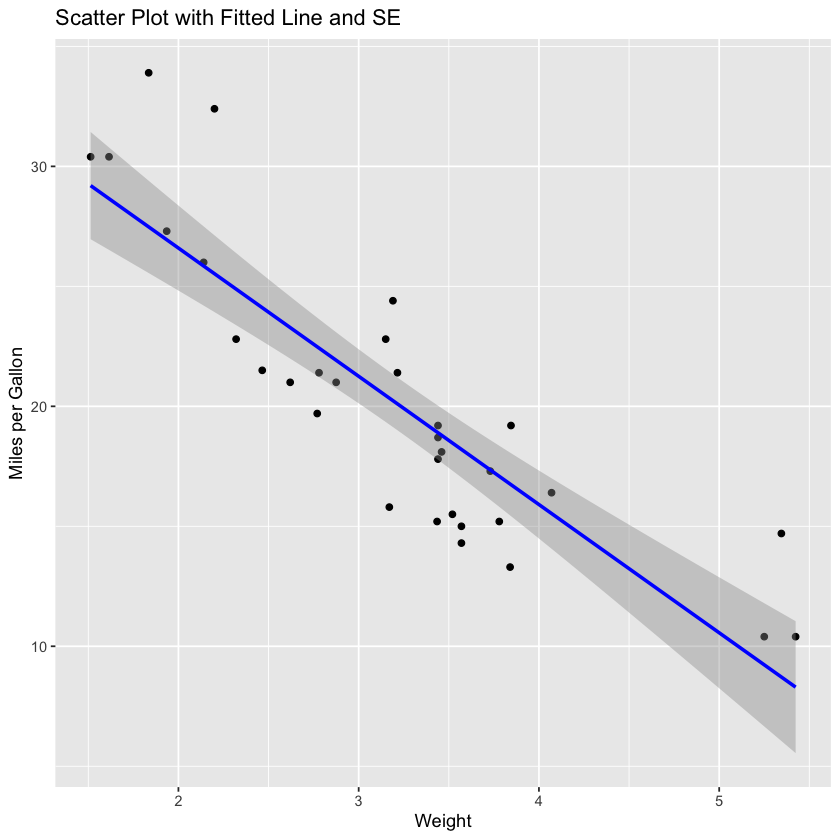

In [6]:
# Scatter plot with fitted line and confidence interval
ggplot(mtcars, aes(x = wt, y = mpg)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
    labs(title = "Scatter Plot with Fitted Line and SE", x = "Weight", y = "Miles per Gallon")

#### Bar Plot
Bar plots are useful for comparing quantities across categories. Here, we demonstrate different types of bar plots and how to customize them.

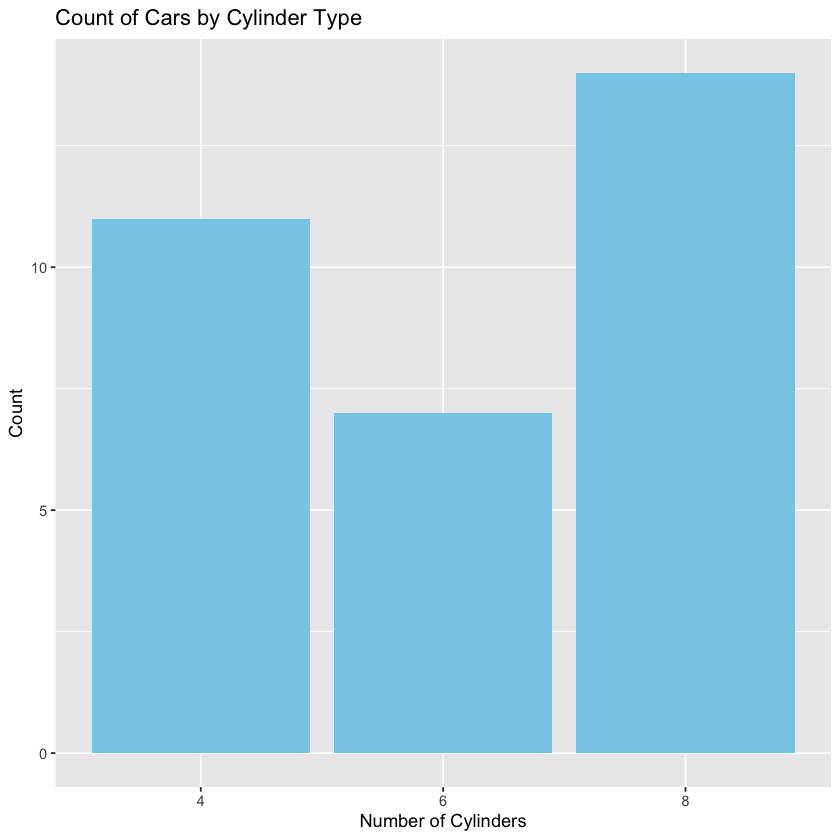

In [7]:
# Bar plot of counts of cars by number of cylinders
ggplot(mtcars, aes(x = cyl)) +
    geom_bar(fill = "skyblue") +
    labs(title = "Count of Cars by Cylinder Type", x = "Number of Cylinders", y = "Count")

#### Histogram
Histograms are useful for visualizing the distribution of a single continuous variable.

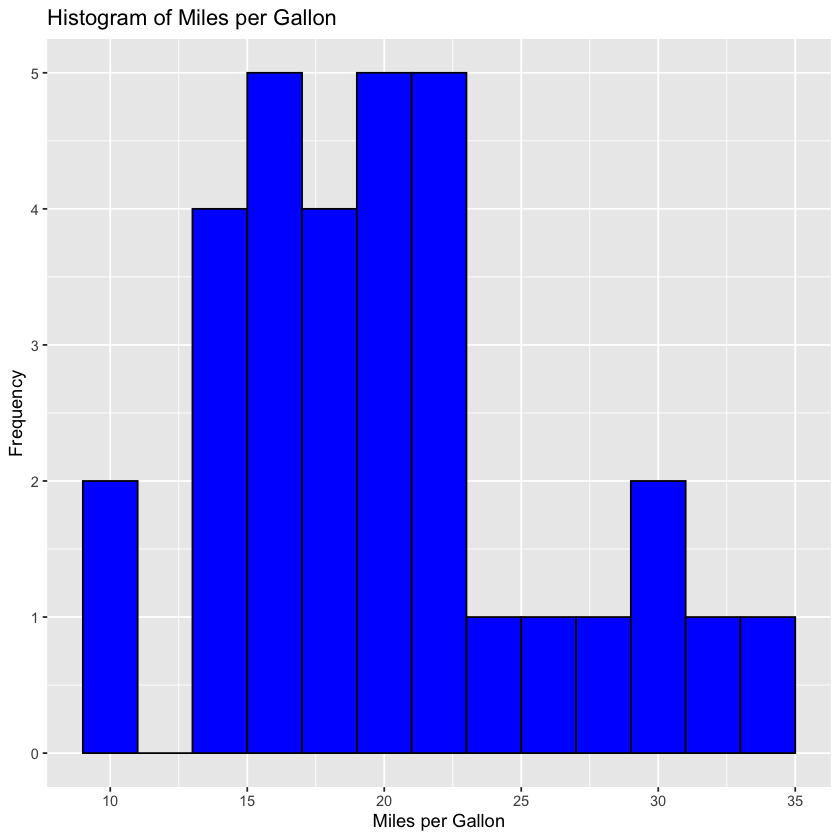

In [8]:
# Histogram of miles per gallon (mpg) in mtcars
ggplot(mtcars, aes(x = mpg)) +
    geom_histogram(binwidth = 2, fill = "blue", color = "black") +
    labs(title = "Histogram of Miles per Gallon", x = "Miles per Gallon", y = "Frequency")

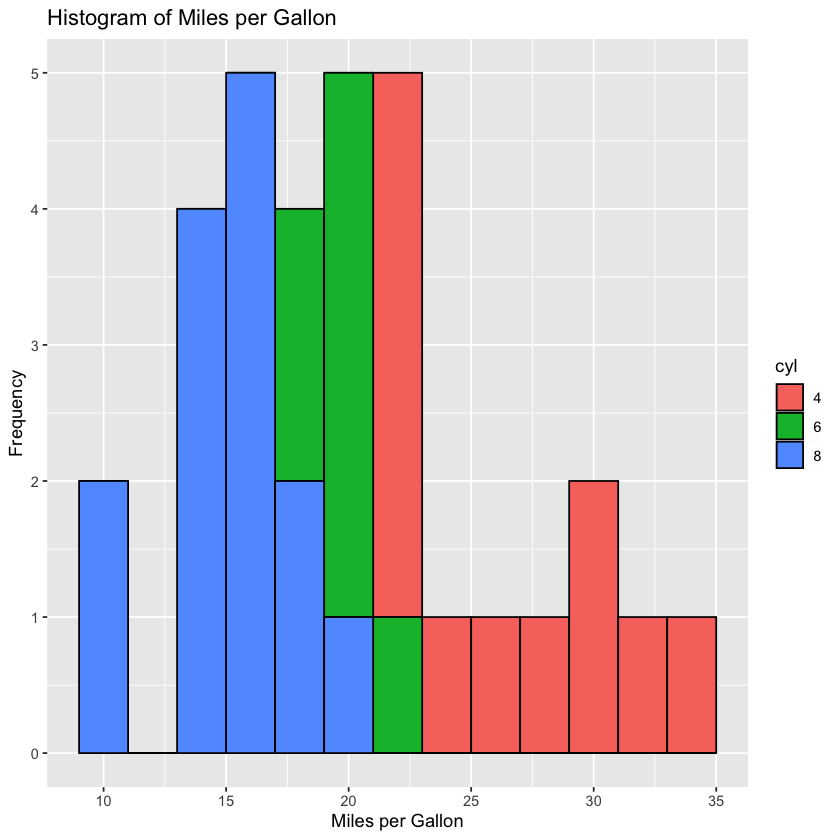

In [23]:
ggplot(mtcars, aes(x = mpg, fill=cyl)) +
    geom_histogram(binwidth = 2,  color = "black", position = "stack") +
    labs(title = "Histogram of Miles per Gallon", x = "Miles per Gallon", y = "Frequency")

Combines histograms for each cylinder type into one plot, with transparency (alpha = 0.4) to help distinguish the overlapping areas.

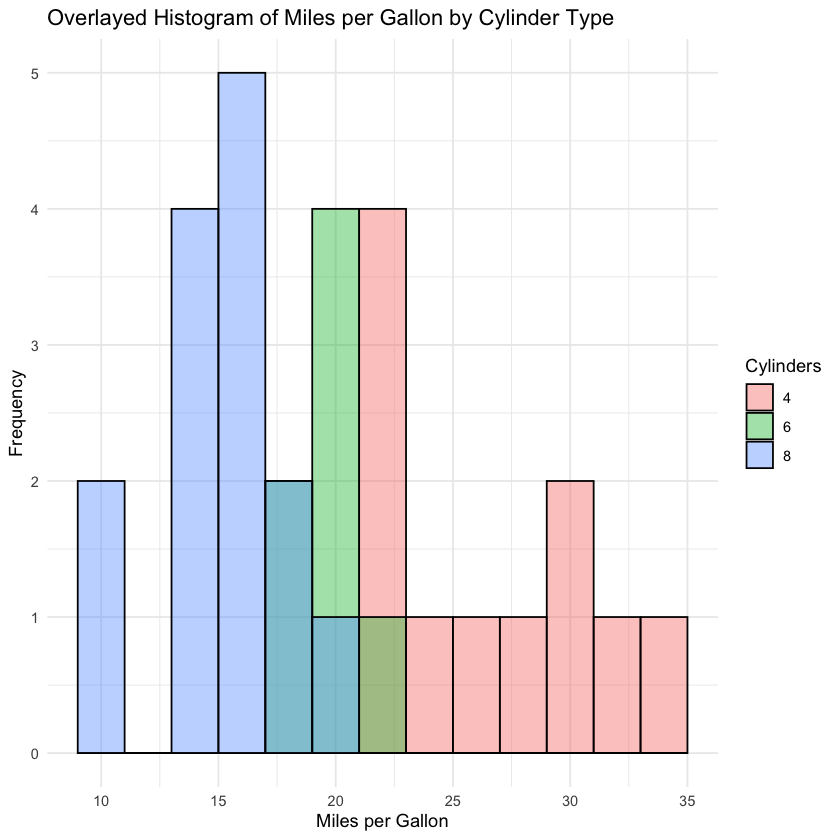

In [35]:
# Overlayed histogram by number of cylinders
ggplot(mtcars, aes(x = mpg, fill = cyl)) +
    geom_histogram(binwidth = 2, color = "black", alpha = 0.4, position = "identity") +
    labs(title = "Overlayed Histogram of Miles per Gallon by Cylinder Type", x = "Miles per Gallon", y = "Frequency", fill = "Cylinders") +
    theme_minimal()

Shows individual histograms for each cylinder type in separate panels.

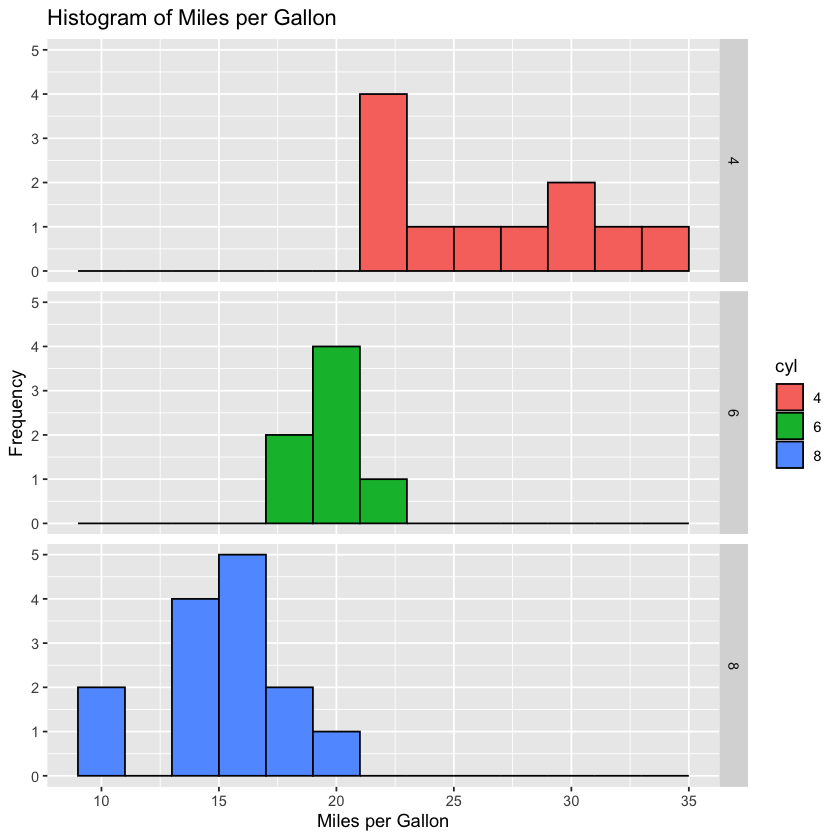

In [24]:
ggplot(mtcars, aes(x = mpg, fill=cyl)) +
    facet_grid(cyl~.)+
    geom_histogram(binwidth = 2,  color = "black") +
    labs(title = "Histogram of Miles per Gallon", x = "Miles per Gallon", y = "Frequency")

#### Box Plot

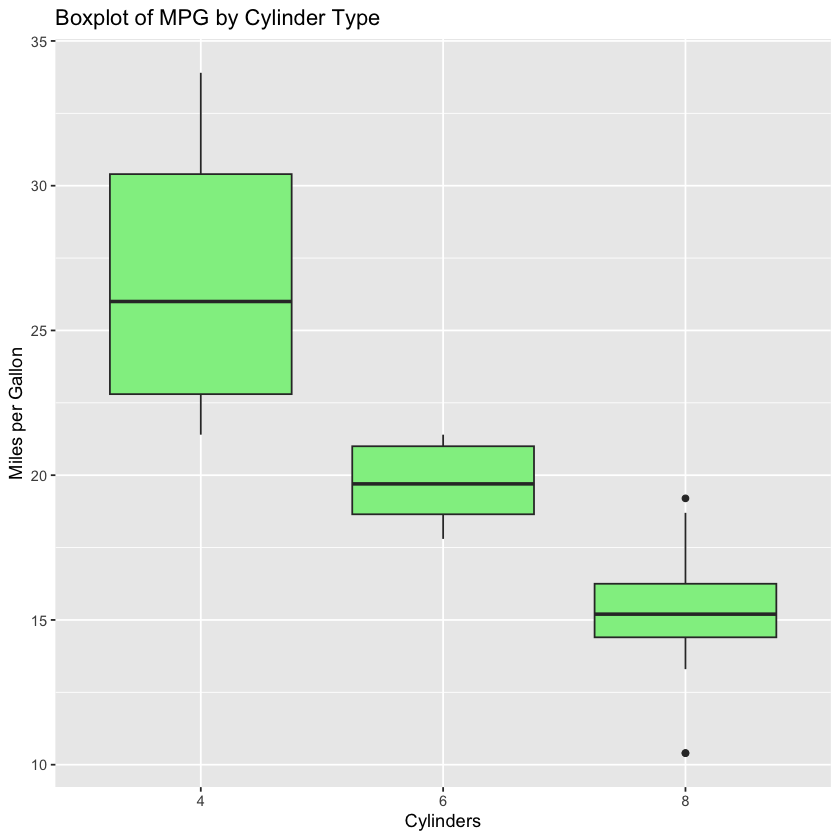

In [11]:
# Boxplot of miles per gallon (mpg) grouped by number of cylinders
ggplot(mtcars, aes(x = cyl, y = mpg)) +
    geom_boxplot(fill = "lightgreen") +
    labs(title = "Boxplot of MPG by Cylinder Type", x = "Cylinders", y = "Miles per Gallon")


#### Correlation Matrix

A correlation matrix helps to visualize the relationships between multiple continuous variables.

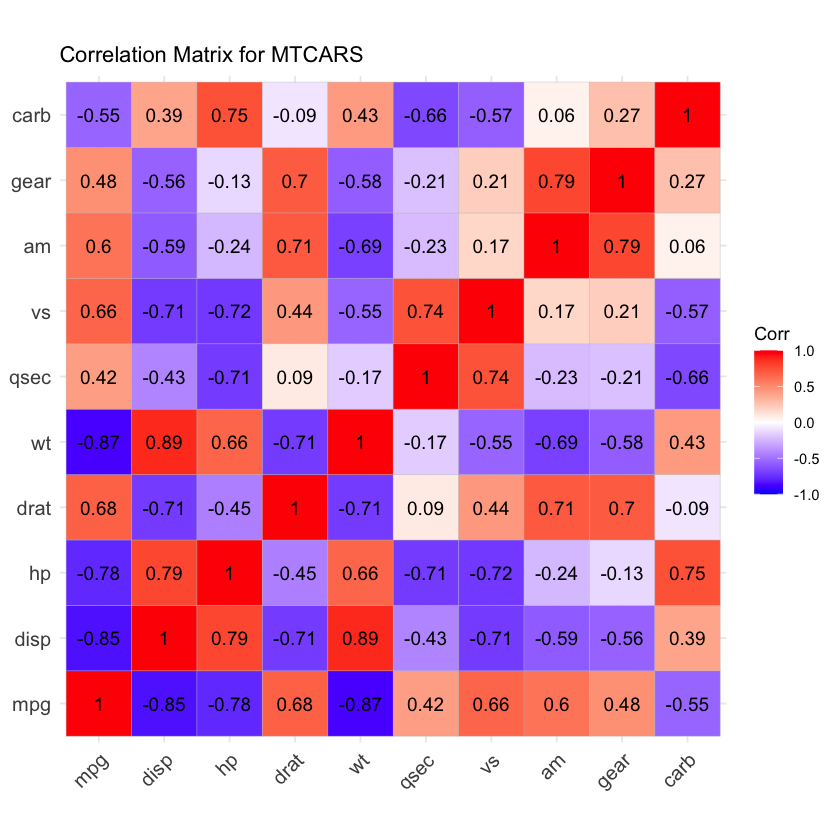

In [17]:
# Calculate correlation matrix for numeric columns in mtcars
cor_matrix <- cor(mtcars[, sapply(mtcars, is.numeric)])

# Plot correlation matrix
ggcorrplot(cor_matrix, lab = TRUE, title = "Correlation Matrix for MTCARS")

#### Pie Chart

Pie charts show proportions of categories in a whole. In `ggplot2`, pie charts can be created by converting a bar plot into a polar coordinate system.

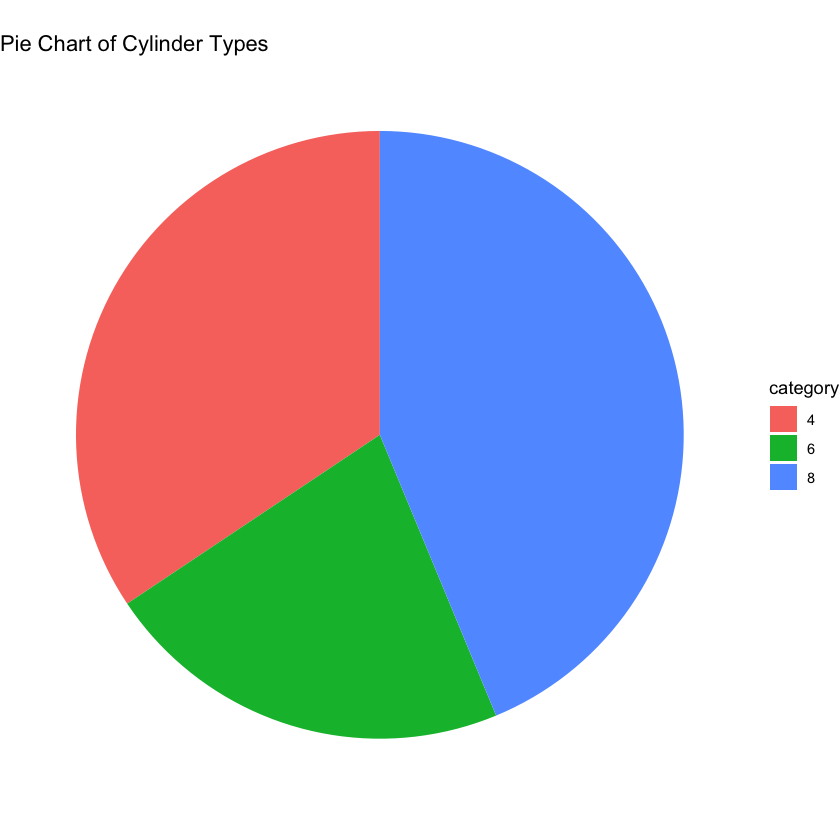

In [26]:
# Sample data for pie chart
pie_data <- mtcars %>%
    count(cyl) %>%
    rename(category = cyl, count = n)

# Create a pie chart
ggplot(pie_data, aes(x = "", y = count, fill = category)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y") +
    labs(title = "Pie Chart of Cylinder Types") +
    theme_void()

#### Combining Multiple Plots

Using the `patchwork` or `cowplot` package, you can arrange multiple plots within a single visualization.

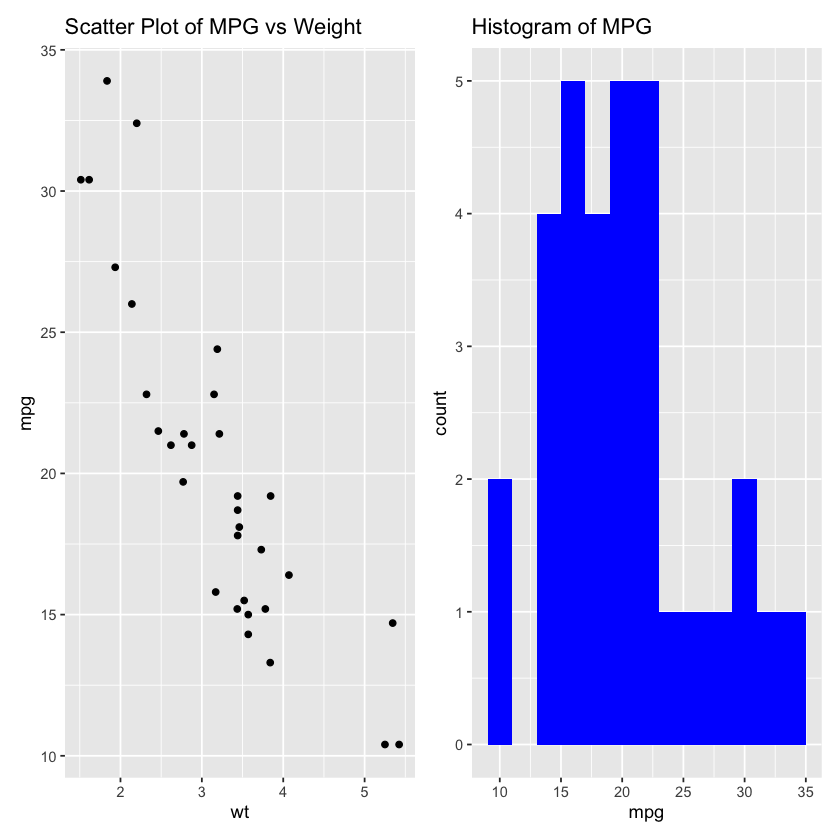

In [29]:
# Create two basic plots to combine
p1 <- ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() + labs(title = "Scatter Plot of MPG vs Weight")
p2 <- ggplot(mtcars, aes(x = mpg)) + geom_histogram(binwidth = 2, fill = "blue") + labs(title = "Histogram of MPG")

# Combine plots using patchwork
p1 + p2

<div class="alert alert-block alert-success"><b>Customizing Plots</b> </div>

Customization allows you to enhance your plots for better communication of your data insights. You can modify colors, themes, labels, and more to make your plots clearer and more informative.

#### Customizing Colors

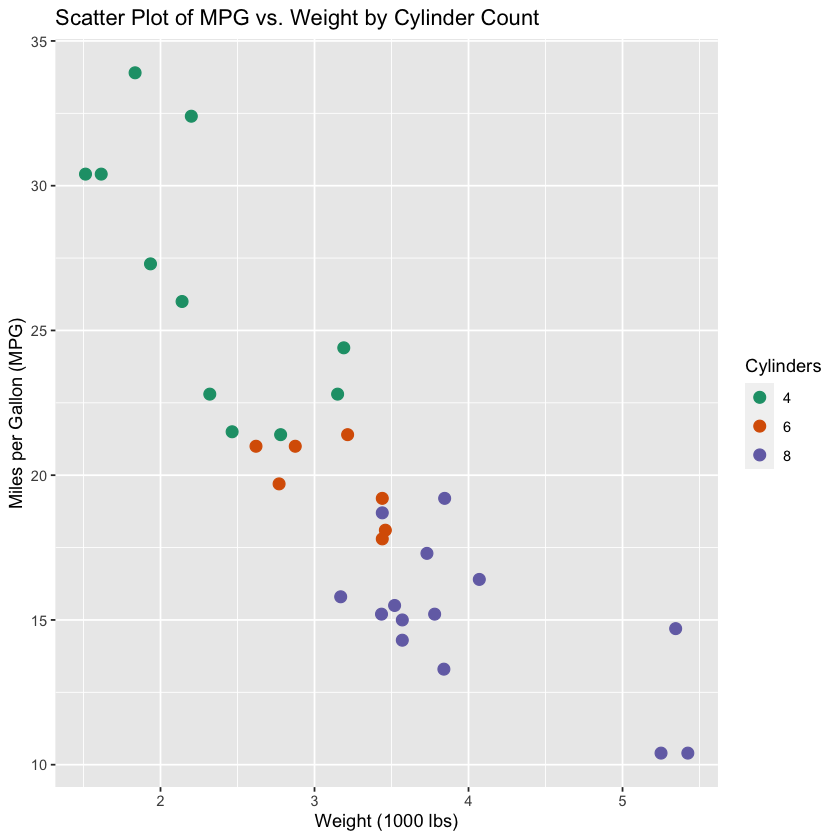

In [34]:
# Customize colors in a scatter plot
ggplot(data = mtcars, aes(x = wt, y = mpg, color = cyl)) +
  geom_point(size = 3) +
  scale_color_brewer(palette="Dark2") +
  labs(title = "Scatter Plot of MPG vs. Weight by Cylinder Count",
       x = "Weight (1000 lbs)",
       y = "Miles per Gallon (MPG)",
       color = "Cylinders")

![alternatvie text](https://r-graph-gallery.com/42-colors-names_files/figure-html/thecode-1.png)

#### Customizing Themes

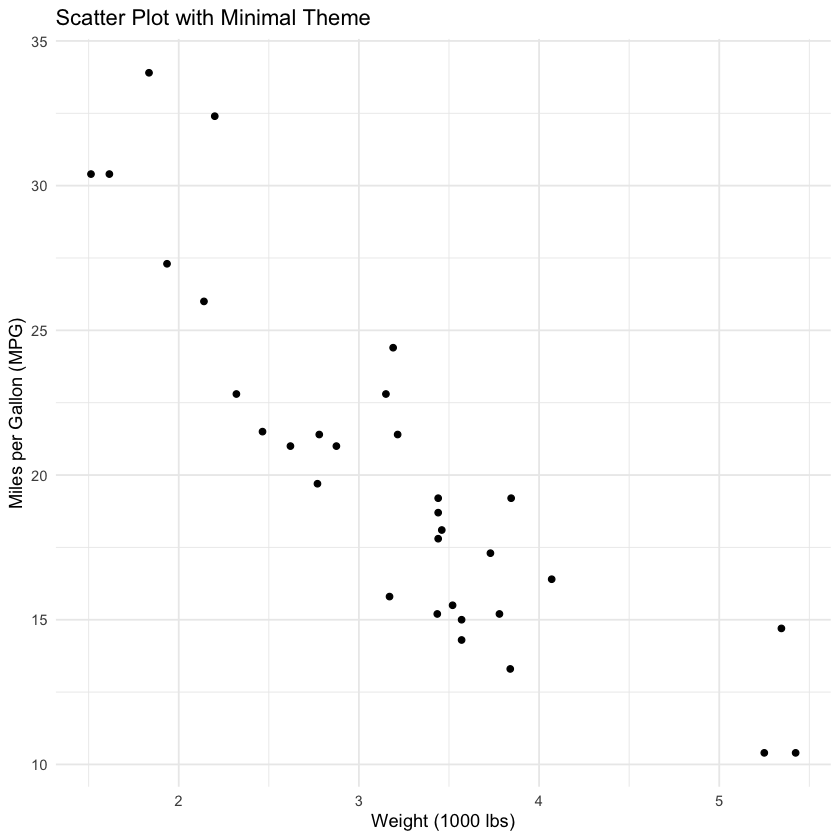

In [6]:
# Use a different theme
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  theme_minimal() +
  labs(title = "Scatter Plot with Minimal Theme",
       x = "Weight (1000 lbs)",
       y = "Miles per Gallon (MPG)")

<div class="alert alert-block alert-success"><b>Faceting</b></div>

Faceting allows you to create multiple subplots that show different subsets of the data. This is particularly useful for comparing groups.

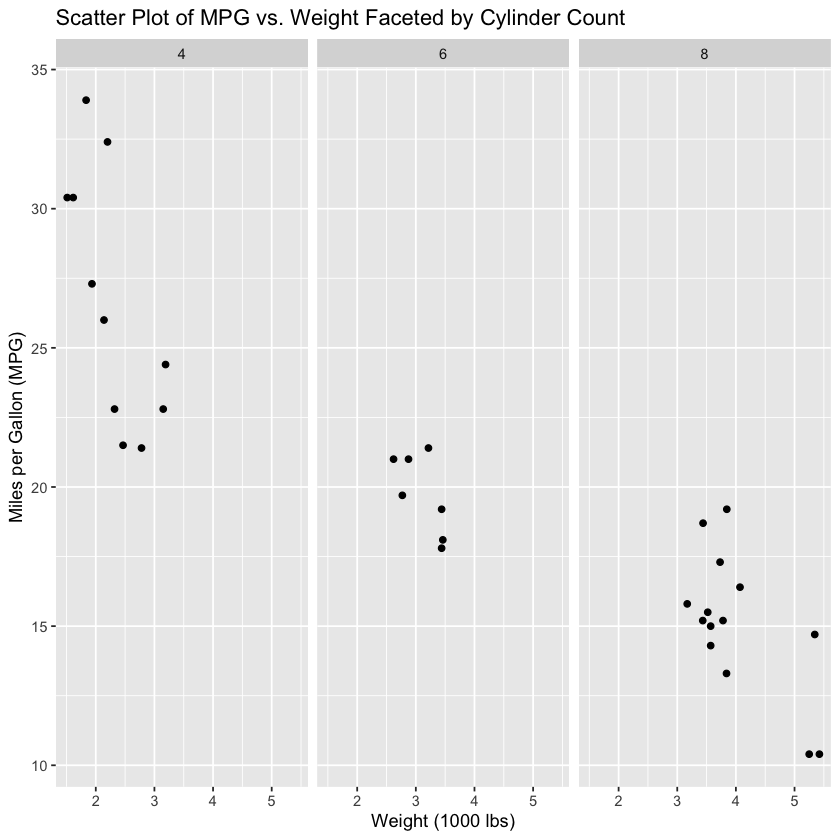

In [7]:
# Facet by cylinder count
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  facet_wrap(~ cyl) +
  labs(title = "Scatter Plot of MPG vs. Weight Faceted by Cylinder Count",
       x = "Weight (1000 lbs)",
       y = "Miles per Gallon (MPG)")

<div class="alert alert-block alert-danger"><b>Example:</b> Birmingham Housing Data</div>

Let's apply what we've learned to a real-world dataset. Suppose we have housing data from Birmingham, and we want to visualize the relationship between house prices and other variables such as size and location.

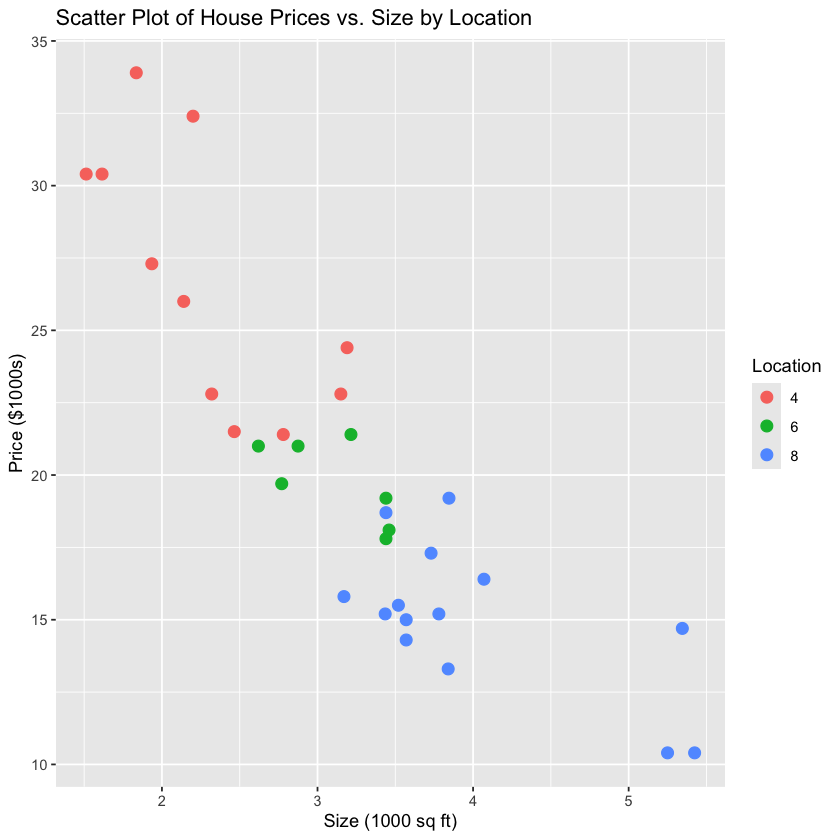

In [10]:
# Example: Load a hypothetical Birmingham housing dataset
# housing_data <- read.csv("data/Birmingham_Housing.csv")

# For demonstration, we'll use the mtcars dataset again, but imagine it represents housing data
# Price (mpg) vs. Size (wt) with Location (cyl) as a categorical variable
ggplot(data = mtcars, aes(x = wt, y = mpg, color = factor(cyl))) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of House Prices vs. Size by Location",
       x = "Size (1000 sq ft)",
       y = "Price ($1000s)",
       color = "Location")

- What patterns do you observe in the scatter plot?
- How can you improve the visualization to better communicate the data?

<div class="alert alert-block alert-success">Advanced Visualizations</div>

Advanced visualizations can include techniques such as multi-variable plots, interactive plots, and more complex visual representations.

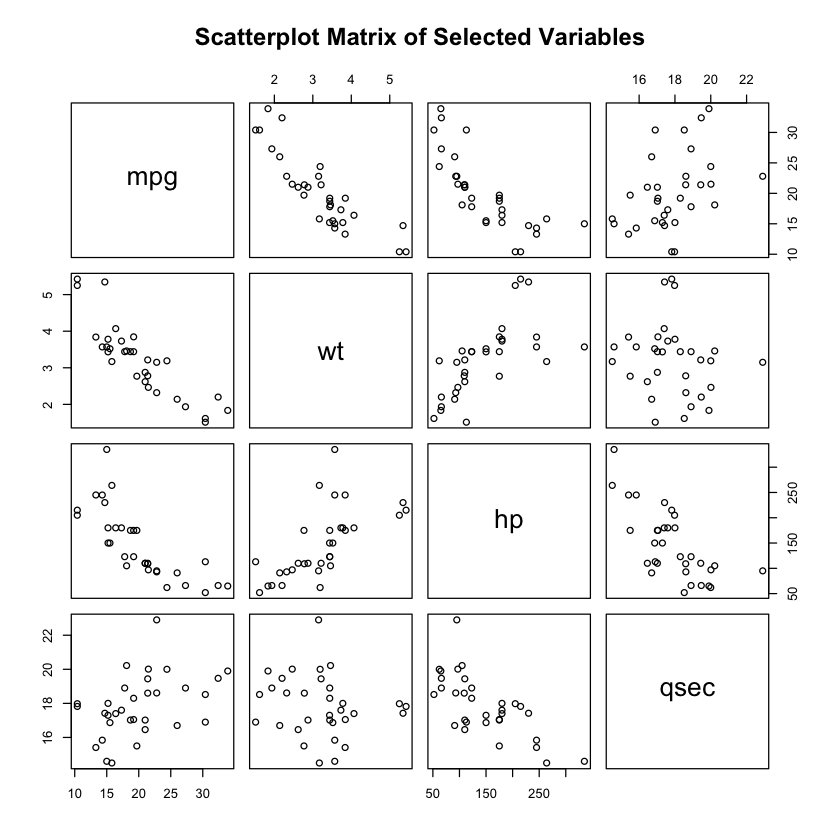

In [12]:
# Create a pair plot (scatterplot matrix)
pairs(mtcars[, c("mpg", "wt", "hp", "qsec")], main = "Scatterplot Matrix of Selected Variables")


**Key Takeaways:**
- Data visualization is a powerful tool for exploring and communicating data.
- `ggplot2` provides a flexible and comprehensive system for creating a wide range of plots.
- Customization and thoughtful design are essential for making your visualizations effective.

**Best Practices:**
- Always label your axes and include a title.
- Choose colors and themes that enhance readability.
- Use facets and subplots to compare groups.
- Be mindful of the story your data is telling and design your visuals accordingly.

### <div class="alert alert-block alert-danger"><b>Practice Exercise</b></div>

Now that you've seen examples of different types of visualizations, it's your turn to create some of your own!

#### Instructions:
1. **Choose a dataset** that we have covered in previous labs. Possible options include:
   - The `mtcars` dataset we used in this chapter.
   - Any dataset from earlier chapters, such as Birmingham temperature data, community garden data, or any other local datasets we’ve explored.

2. **Task**:
   - Use the `dplyr` package to count the occurrences of a categorical variable in your chosen dataset.
   - Create a pie chart using `ggplot2` to represent the distribution of this variable.

3. **Example Questions to Guide You**:
   - What is the distribution of categories like car types, locations, or other groups in your dataset?
   - Can you create both a faceted bar plot and a pie chart to represent these categories?
   - Try adding labels or percentages to your charts to make them more informative.

#### Tip:
Use the example code above as a reference, but modify it to fit the structure of your chosen dataset. Experiment with colors, labels, and other customizations to make your visualization clear and engaging.

Good luck, and have fun exploring data visualization in R!